In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pathlib

from data_cleaner import cleaner,geo_cleaner

In [18]:
data = pd.read_csv("./data/alcohol-consumption.csv")
data = cleaner(data)
data.head(44)

,country,total_consumption,recorded_consumption,unrecorded_consumption,beer_percentage,wine_percentage,spirits_percentage,other_percentage
0,Albania,7.5,5.0,2.5,34.3,26.5,37.6,1.7
1,Andorra,11.3,10.1,1.6,34.1,42.0,23.9,0.0
2,Armenia,5.5,3.8,1.7,10.6,7.0,82.3,0.1
3,Austria,11.6,11.4,0.4,53.5,31.6,14.9,0.0
4,Azerbaijan,0.8,0.5,0.3,61.5,36.9,0.0,1.5
5,Belarus,11.2,9.6,1.5,22.8,2.2,49.0,26.0
6,Belgium,12.1,10.4,1.0,44.4,38.3,14.2,3.1
7,Bosnia and Herzegovina,6.4,4.4,1.8,75.8,8.6,12.4,3.2
8,Bulgaria,12.7,11.4,1.3,38.8,17.2,42.9,1.2
9,Croatia,8.9,9.9,1.4,44.5,39.0,13.0,3.5


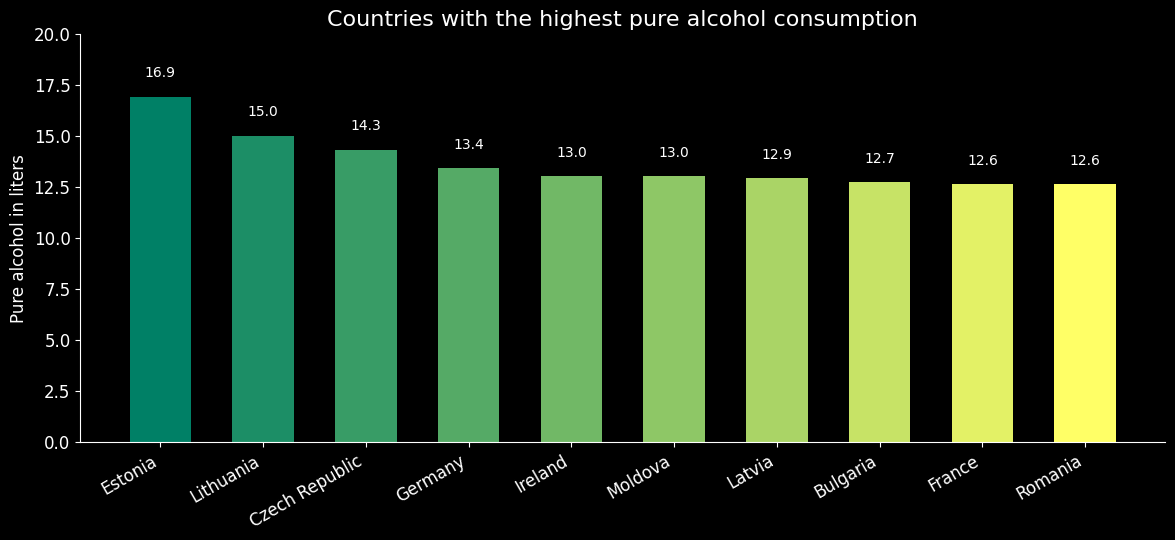

In [19]:
sorted_by_alcohol_high = data.sort_values(by='total_consumption', ascending=False)
x = sorted_by_alcohol_high['country'].head(10)
y = sorted_by_alcohol_high['total_consumption'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.summer  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 20))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 1, f"{liters:.1f}", ha="center")

ax.set_title("Countries with the highest pure alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Pure alcohol in liters", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

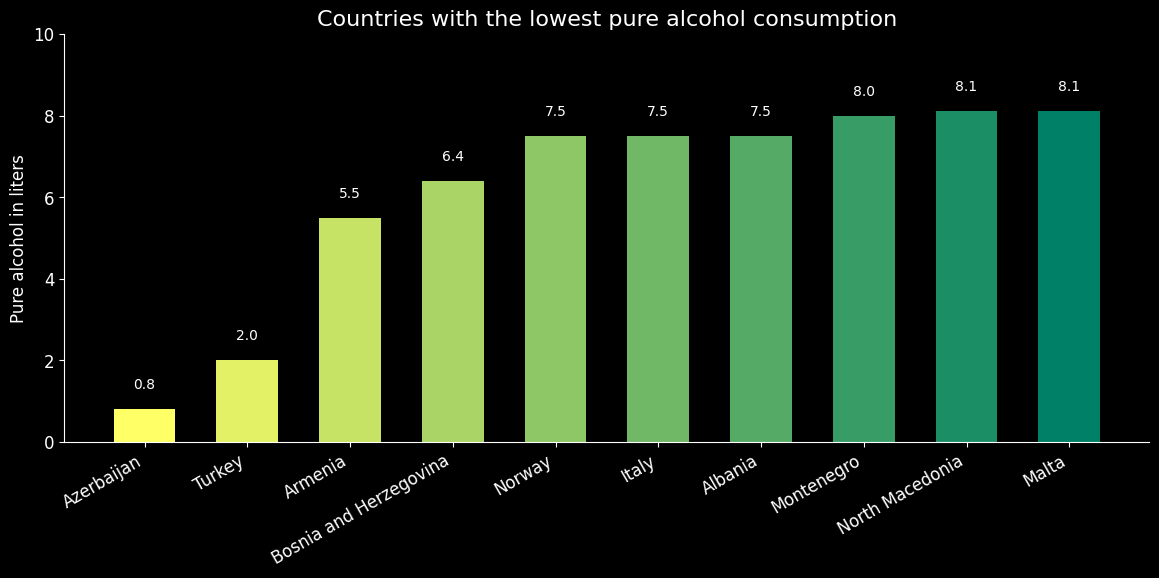

In [20]:
sorted_by_alcohol_low = data.sort_values(by='total_consumption')
x = sorted_by_alcohol_low['country'].head(10)
y = sorted_by_alcohol_low['total_consumption'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.summer_r  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 10))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 0.5, f"{liters:.1f}", ha="center")

ax.set_title("Countries with the lowest pure alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Pure alcohol in liters", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

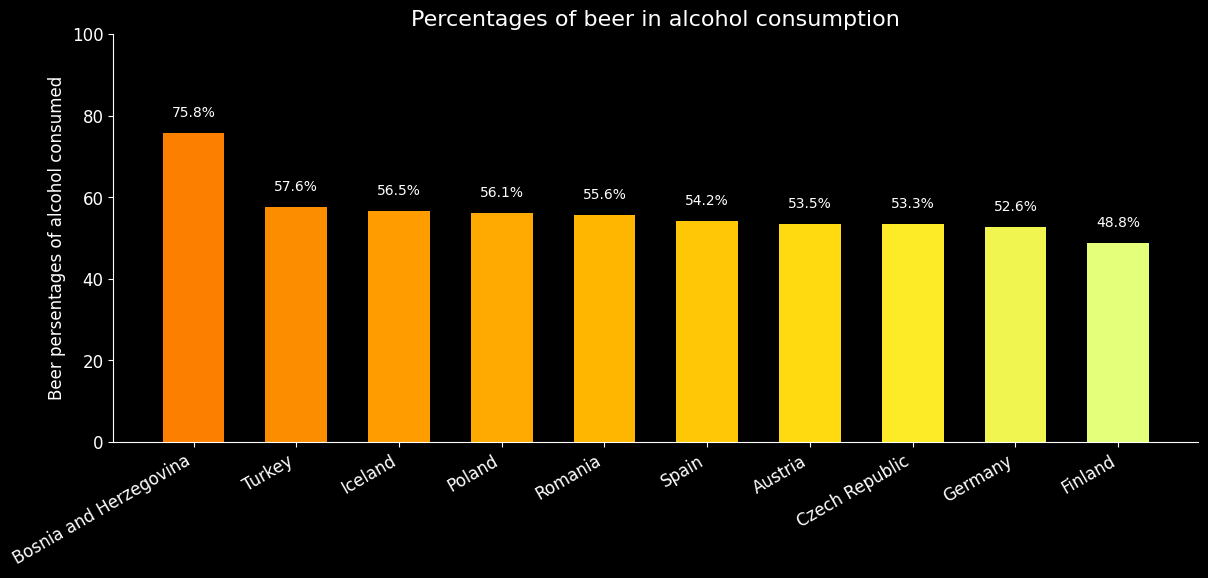

In [5]:
sorted_by_beer = data.sort_values(by='beer_percentage', ascending=False)
x = sorted_by_beer['country'].head(10)
y = sorted_by_beer['beer_percentage'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.Wistia_r  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 100))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 5, f"{liters}%", ha="center", va="center")

ax.set_title("Percentages of beer in alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Beer persentages of alcohol consumed", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

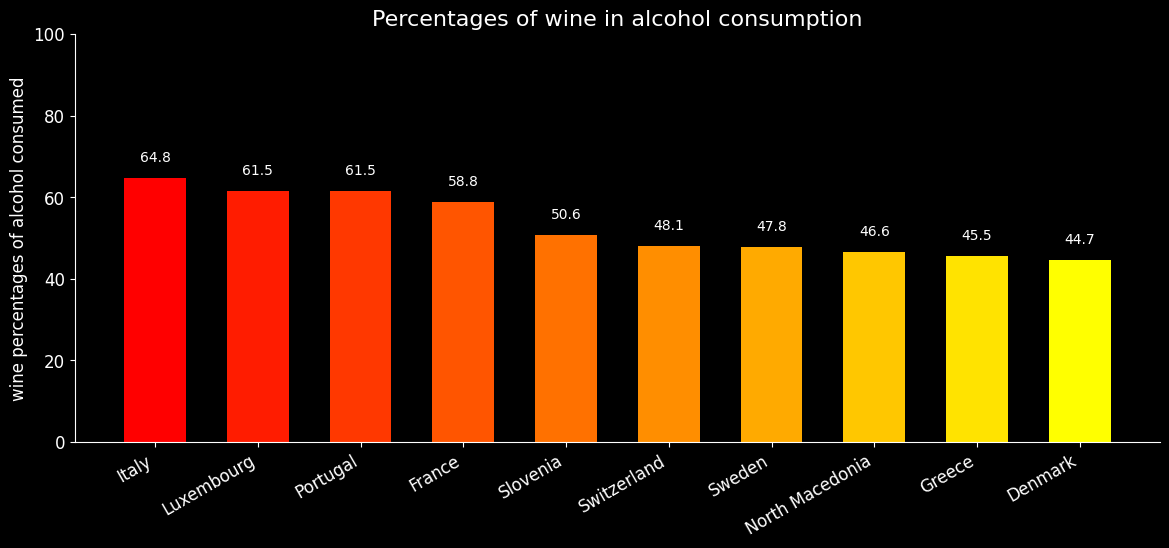

In [8]:
sorted_by_wine = data.sort_values(by='wine_percentage', ascending=False)
x = sorted_by_wine['country'].head(10)
y = sorted_by_wine['wine_percentage'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.autumn  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 100))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 5, f"{liters}", ha="center", va="center")

ax.set_title("Percentages of wine in alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("wine percentages of alcohol consumed", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

In [40]:
geodata = gpd.read_file("./europe.geojson")

geodata = geo_cleaner(geodata)
geodata.head()




,country,geometry
0,Albania,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1..."
1,Andorra,"POLYGON ((1.78172 42.56996, 1.77472 42.57111, ..."
2,Armenia,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
3,Austria,"POLYGON ((13.83361 48.7736, 13.85806 48.77055,..."
4,Azerbaijan,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."


(np.float64(-28.28808575),
 np.float64(54.120850749999995),
 np.float64(32.732942050000005),
 np.float64(72.98431695))

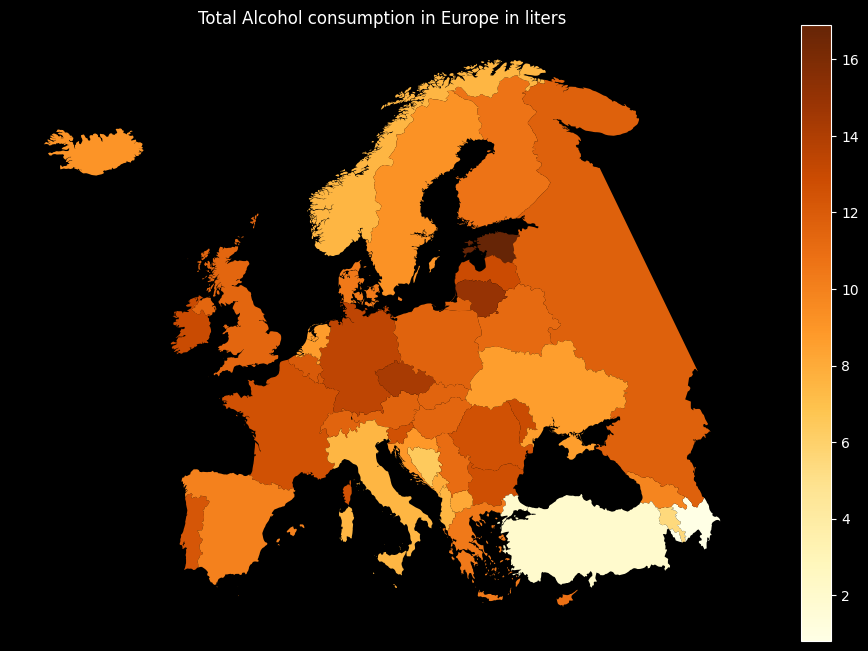

In [58]:

merged = geodata.merge(data, on='country', how='inner')
merged.head()
fig, ax = plt.subplots(figsize=(12,8))
merged.plot(column='total_consumption', cmap='YlOrBr', legend=True, ax=ax)
ax.set_title("Total Alcohol consumption in Europe in liters")
plt.axis('off')
